# Test PAGA algorithm

Citation: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-019-1663-x

Github link: https://github.com/theislab/paga

In [22]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
import scanpy.external as sce
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#sc.settings.set_figure_params(dpi=150, figsize=(6,6))
sc.settings.verbosity = 3
sc.logging.print_version_and_date()

Running Scanpy 1.7.1, on 2022-02-16 13:48.


In [4]:
# Single cell data table
scdata_path = "tests/nki_cycif/input_data/TMA_34_504_cellTypes.csv"
scdata_df = pd.read_csv(scdata_path)

# Excel file with the user prior knowledge
logic_xlsx_path = "tests/nki_cycif/celltype_description.xlsx"
logic_xlsx = pd.ExcelFile(logic_xlsx_path)
logic_df = pd.read_excel(logic_xlsx, logic_xlsx.sheet_names, index_col=0)
levels = list(logic_df.keys())

level_id = 0 # this test considers only the first level
level = levels[level_id]

#data_df = np.log2(scdata_df[logic_df[level].index.values])
#data_np = data_df.to_numpy()

In [16]:
data_df = scdata_df[logic_df[level].index.values]

In [38]:
print(data_df)

              CK7   ECadherin         CD3d         CD20         CD4  \
0       46.253247  327.097403   525.285714  1152.675325  455.636364   
1       48.748387  352.270968   656.116129  1179.432258  463.490323   
2       50.938776  339.006803  1021.761905  1209.857143  483.027211   
3       65.363128  393.039106  1118.748603  1225.117318  570.229050   
4       55.448454  365.000000   713.417526  1277.840206  476.855670   
...           ...         ...          ...          ...         ...   
304620  48.808511  328.957447   507.666667  1206.340426  464.879433   
304621  57.120104  349.454308   538.443864  1208.524804  521.318538   
304622  42.491694  326.355482   629.495017  1708.029900  561.073090   
304623  62.436567  347.197761   509.018657  1162.615672  477.003731   
304624  51.213333  330.693333   459.213333  1217.400000  494.666667   

               CD8a        aSMA     Vimentin         CD31        CD11c  \
0       2560.681818   90.012987   248.311688   941.668831   815.415584   

In [17]:
# write file so scanpy can read it because the boolean column gives error
data_df.to_csv("TMA34_504_clean.csv")

In [39]:
adata = sc.read_csv("TMA34_504_clean.csv", first_column_names=True)

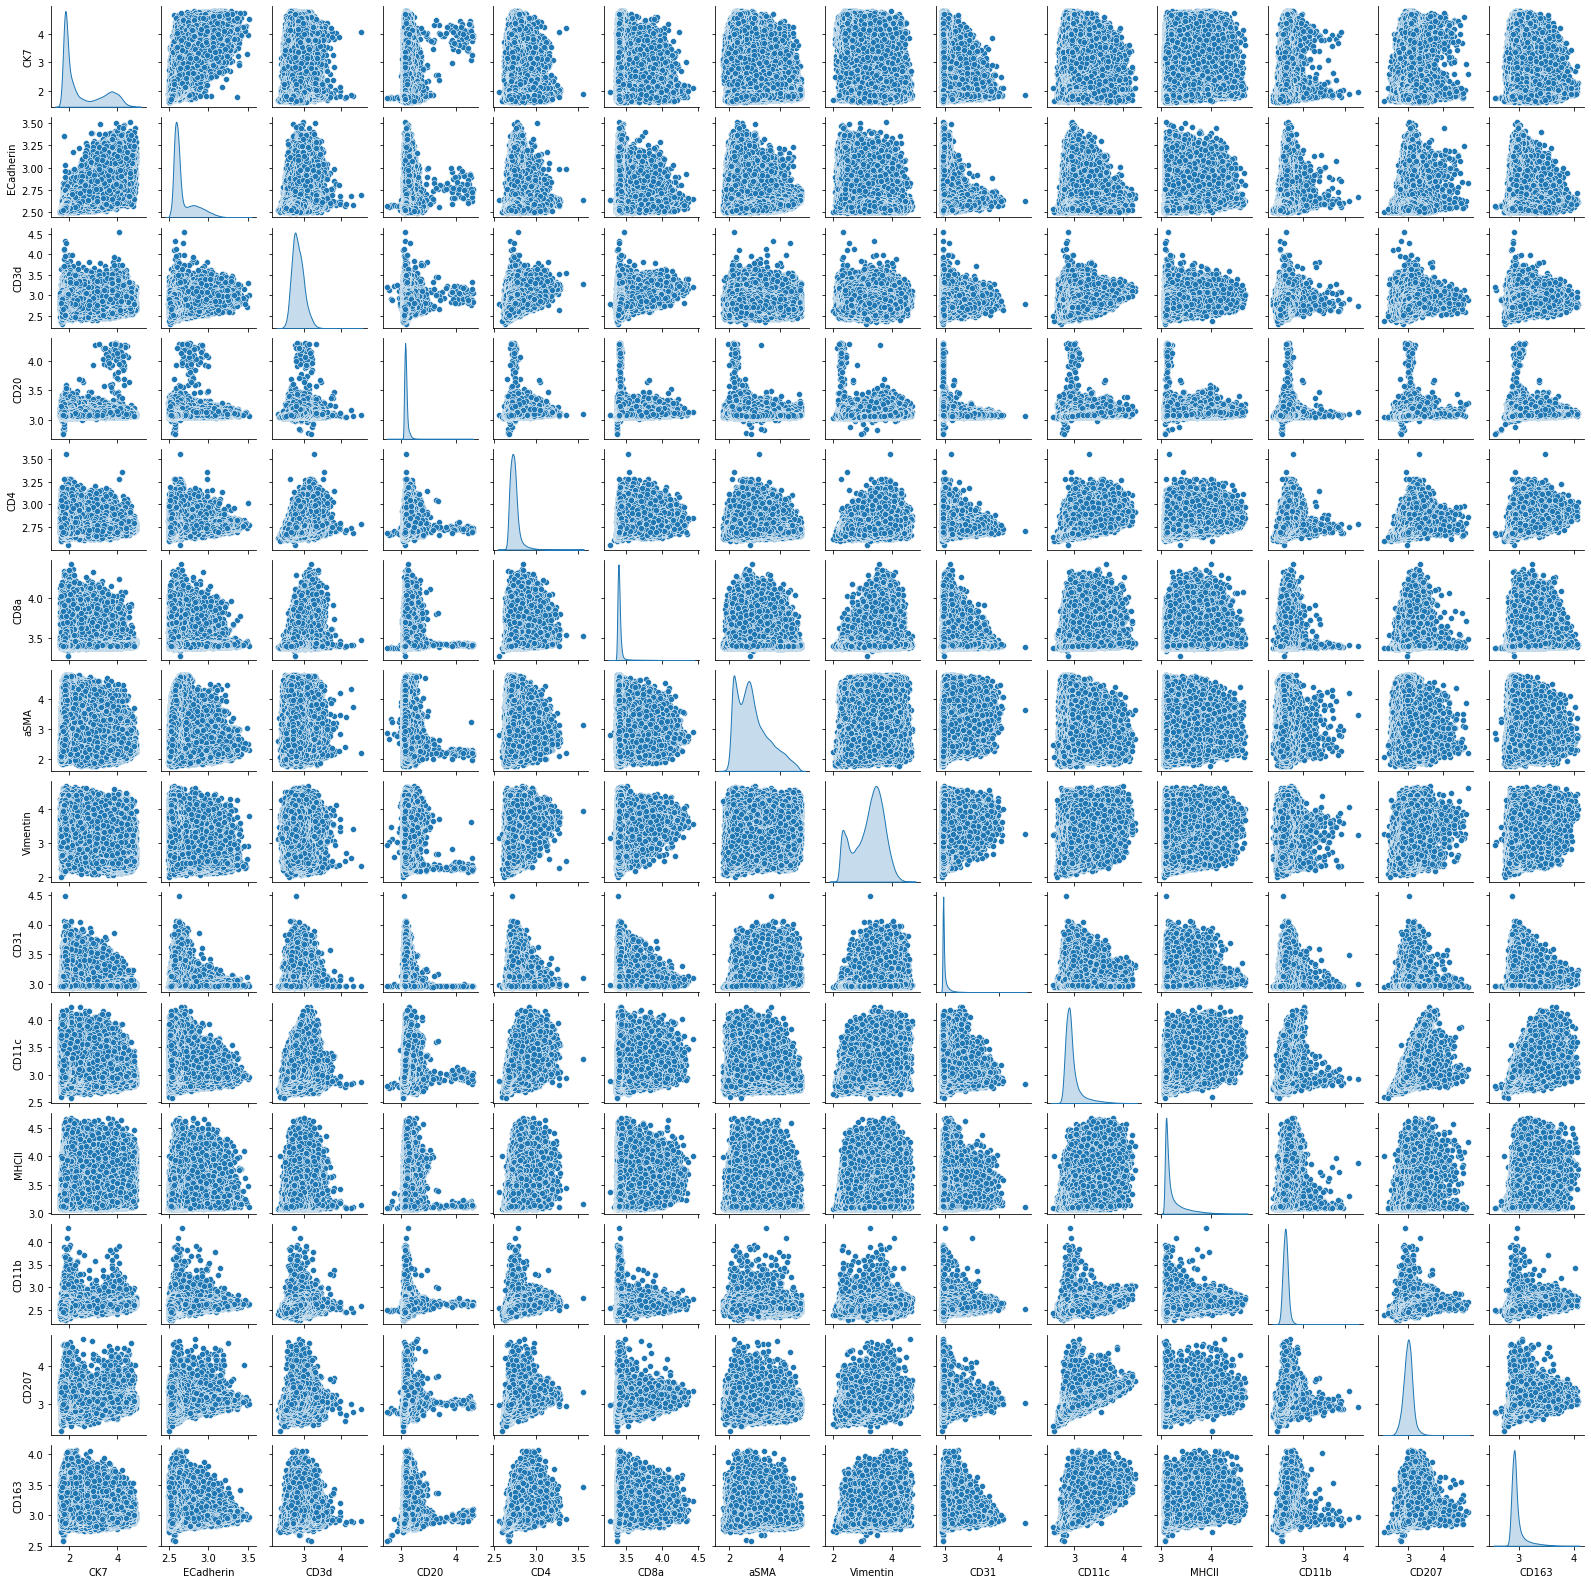

In [47]:
g = sns.pairplot(adata.to_df(), diag_kind="kde", height=1.6)
# upper outliers on CD3d, CD4, CD31
# lower outliers on CD20, CD8a, CD4, 

In [40]:
sc.pp.log1p(adata,base=10)

In [41]:
df = adata.to_df()
print(df)

             CK7  ECadherin      CD3d      CD20       CD4      CD8a      aSMA  \
0       1.674432   2.516003  2.721222  3.062083  2.659570  3.408525  1.959103   
1       1.696779   2.548108  2.817642  3.072041  2.666977  3.474827  2.143599   
2       1.715492   2.531488  3.009774  3.083093  2.684870  3.698319  2.168682   
3       1.821927   2.595539  3.049121  3.088532  2.756810  3.672839  2.173853   
4       1.751652   2.563481  2.853952  3.106816  2.679297  3.400133  2.352053   
...          ...        ...       ...       ...       ...       ...       ...   
304620  1.697304   2.518458  2.706433  3.081830  2.668273  3.404540  2.530853   
304621  1.764326   2.544631  2.731946  3.082615  2.717935  3.413222  2.479740   
304622  1.638406   2.515020  2.799681  3.232750  2.749793  3.415164  2.101526   
304623  1.802340   2.541826  2.707586  3.065809  2.679431  3.399967  2.667122   
304624  1.717781   2.520737  2.662959  3.085790  2.695190  3.403068  2.253532   

        Vimentin      CD31 

In [49]:
#print(df.max(axis=0))
print(df.idxmax())

CK7           72589
ECadherin    142242
CD3d         280458
CD20         200777
CD4          177269
CD8a         178702
aSMA         179020
Vimentin      69413
CD31         171690
CD11c        153541
MHCII        291145
CD11b        274354
CD207        130105
CD163         11472
dtype: object
CK7          303670
ECadherin    123391
CD3d          11341
CD20         169409
CD4          144100
CD8a         144100
aSMA         259796
Vimentin     243868
CD31          84509
CD11c        279819
MHCII        243868
CD11b         69369
CD207        278227
CD163        169409
dtype: object


In [50]:
#print(df.min(axis=0))
print(df.idxmin())

CK7          303670
ECadherin    123391
CD3d          11341
CD20         169409
CD4          144100
CD8a         144100
aSMA         259796
Vimentin     243868
CD31          84509
CD11c        279819
MHCII        243868
CD11b         69369
CD207        278227
CD163        169409
dtype: object


In [44]:
sc.pp.pca(adata, n_comps=13)

computing PCA
    with n_comps=13
    finished (0:00:00)


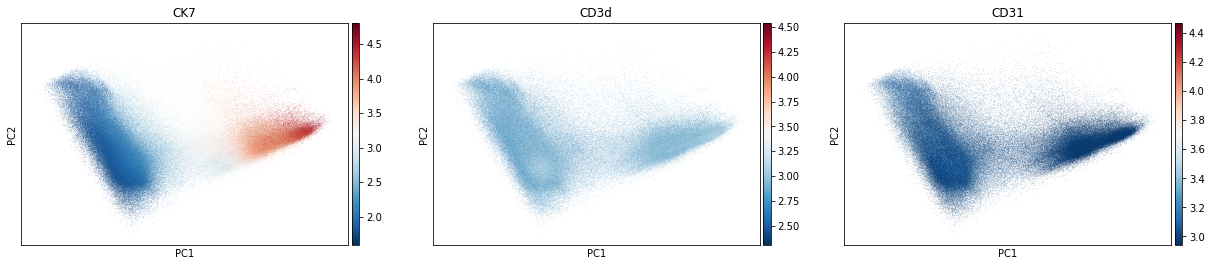

In [46]:
sc.pl.pca(adata, color=["CK7", "CD3d", "CD31"], cmap="RdBu_r")

In [25]:
sc.pp.neighbors(adata)

In [28]:
sc.tl.leiden(adata)

In [40]:
sc.tl.louvain(adata)

In [44]:
sc.tl.paga(adata, groups='leiden')

--> added 'pos', the PAGA positions (adata.uns['paga'])


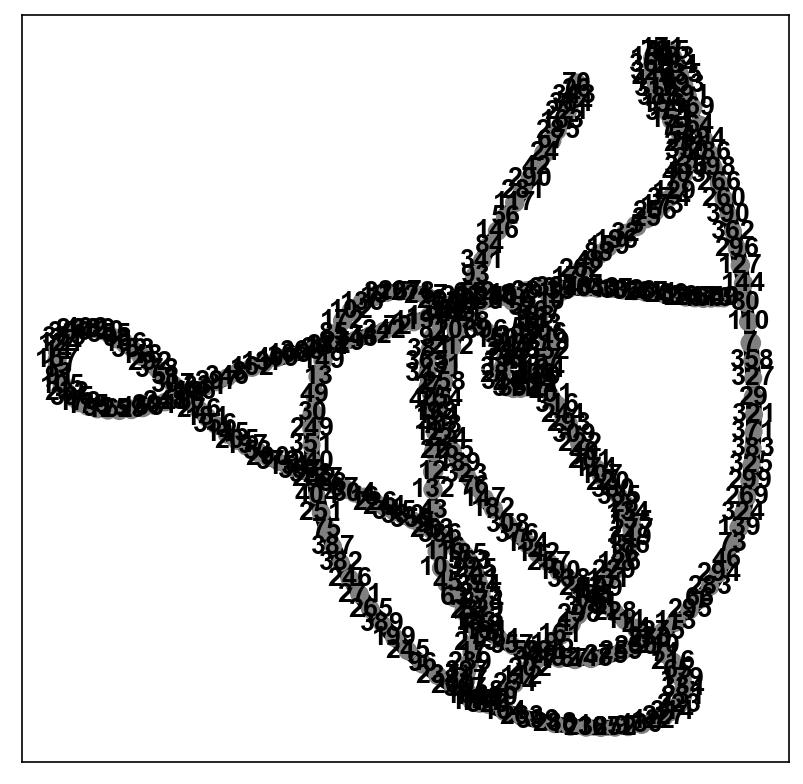

In [56]:
axs = sc.pl.paga(adata)

#, palette=sc.pl.palettes.godsnot_64, color='aga_groups', groups_graph='aga_groups', 
#    node_size_power=0.2, node_size_scale=2,
#    legend_fontsize=16, legend_fontweight='bold',
#    title='Louvain partitions of $\mathcal{G}$.',
#    title_graph='Abstracted graph $\mathcal{G}^*$.',
 #   root=2, layout='rt', save=True)

In [43]:
adata.layers

Layers with keys: 